In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
np.set_printoptions(precision=3, suppress=True)

In [2]:
# Load dữ liệu: data-example/example_sales_vn.csv
import csv
file_path = "stock-data/excel_dxg.csv"

def Doc_Data(file_path):
    row_list = []
    with open(file_path, newline='') as csv_file:
        data_csv = csv.reader(csv_file, delimiter=',')
        header = next(data_csv)
        #print(header)
        for row in data_csv:
            row_list.append(row)
    n_rows = len(row_list)
    print("Tổng số dòng data: ", n_rows)
    
    ds_date = []
    ds_open = []
    ds_high = []
    ds_low  = []
    ds_close= []
    for row in row_list:
        ds_date.append(row[1])
        ds_open.append(float(row[7]))
        ds_high.append(float(row[8]))
        ds_low.append(float(row[9]))
        ds_close.append(float(row[10]))
    #print(len(ds_open))
    
    return ds_date, ds_open, ds_high, ds_low, ds_close

ds_date, ds_open, ds_high, ds_low, ds_close = Doc_Data(file_path)
# print("Hiển thị thử 10 dòng đầu:")
# for i in range(10): print(row_list[i])
# print("Hiển thị thử 10 dòng cuối:")
# for i in range(10): print(row_list[-(10-i)])

Tổng số dòng data:  2897


In [3]:
ds_open = np.array(ds_open)
ds_close = np.array(ds_close)
print(ds_open.size, ds_close.size)

2897 2897


In [4]:
ds_diff = ds_close[1:] - ds_close[:-1]

In [5]:
np.mean(ds_diff)

0.008598066298342541

In [6]:
np.median(ds_diff)

0.0

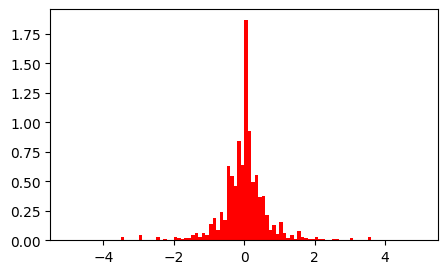

In [7]:
fig, ax = plt.subplots(figsize=(5,3), num=1)
ax.hist(ds_diff, bins=100, color='red', density=True, range=[-5,5])
ax.set_xlabel("")
plt.show()

In [9]:
stats.kurtosis(ds_diff)

577.319472489286

In [10]:
new_ds = ds_diff[ds_diff < 2]
new_ds = new_ds[new_ds > -2]
stats.skew(new_ds)

0.07611723946646005

In [11]:
stats.kurtosis(new_ds)

1.7073450266495414

## Khoảng giá

In [3]:
ds_high = np.array(ds_high)
ds_low = np.array(ds_low)
print(ds_high.size, ds_low.size)

2897 2897


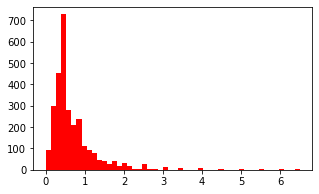

In [4]:
ds_diff = ds_high - ds_low
fig, ax = plt.subplots(figsize=(5,3), num=1)
ax.hist(ds_diff, bins=50, color='red')
ax.set_xlabel("")
plt.show()

In [5]:
np.quantile(ds_diff, [0.25, 0.5, 0.75, 0.90])

array([0.3 , 0.5 , 0.8 , 1.35])